Exploratory Data Analysis (EDA)
- Gain Insight from Raw data
- Detect Errors, outliers, inconsistencies in values.
- Understand Feature Distribution, Skewness, and Correlations.
- Test Initail assumption about the data and it's structures.

- Distribution plots (KDE plots, Violin plots)
- Detect Outliers and Spread (Box plots, Violin plots, Strip plots)
- Categorical Comparison (Bar charts, Count plot, Pie Chart)
- Use Multivariate and Bivariate relationships to understand data trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load  Datasets
df = pd.read_csv("Datasets/laptop_price.csv", encoding="latin1")

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Display Data types of datasets and memory allocation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# Get summary of all columns data.
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
# Capture Empty columns.
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
# Display columns
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [8]:
# check for uniwue values.
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [9]:
# Standardize columns names for consistency.
# Standardise column names to lowercase and add underscores.
df.columns = df.columns.str.lower().str.replace("-", "")
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [10]:
# Correct column abbreviated column names.
df.rename(columns={"cpu": "device_processor (CPU)", "ram": "device_memory (RAM)", "opsys" : "operating_system", "typename": "laptop_type", "memory": "memory_capacity"}, inplace=True)
df.columns

Index(['laptop_id', 'company', 'product', 'laptop_type', 'inches',
       'screenresolution', 'device_processor (CPU)', 'device_memory (RAM)',
       'memory_capacity', 'gpu', 'operating_system', 'weight', 'price_euros'],
      dtype='object')

In [11]:
# Correct screen resolution column name.
df.rename(columns={"screenresolution": "screen_resolution", "company" : "manufacturers_info"}, inplace=True)
df.columns

Index(['laptop_id', 'manufacturers_info', 'product', 'laptop_type', 'inches',
       'screen_resolution', 'device_processor (CPU)', 'device_memory (RAM)',
       'memory_capacity', 'gpu', 'operating_system', 'weight', 'price_euros'],
      dtype='object')

In [12]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

EDA ANALYSIS

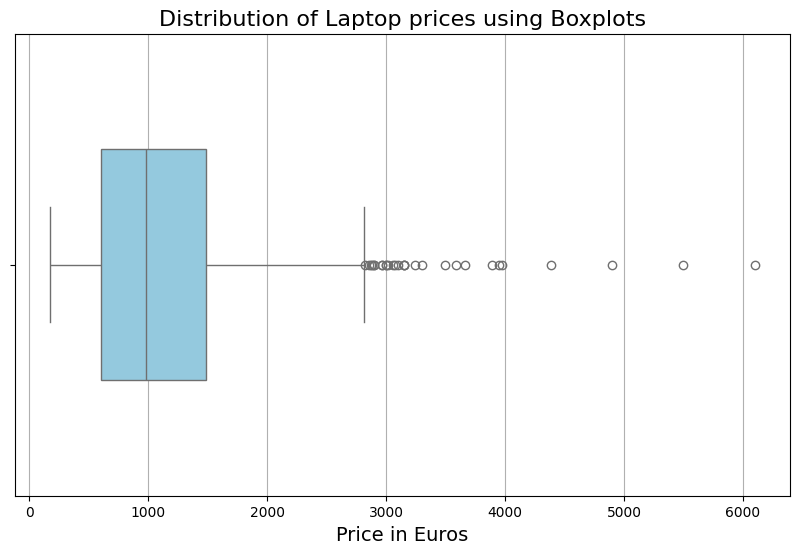

In [14]:
# Distribution of prices using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["price_euros"], color="skyblue", orient="h", width=0.5)
plt.title("Distribution of Laptop prices using Boxplots", fontsize=16)
plt.xlabel("Price in Euros", fontsize=14)
plt.grid(axis="x")
plt.show()

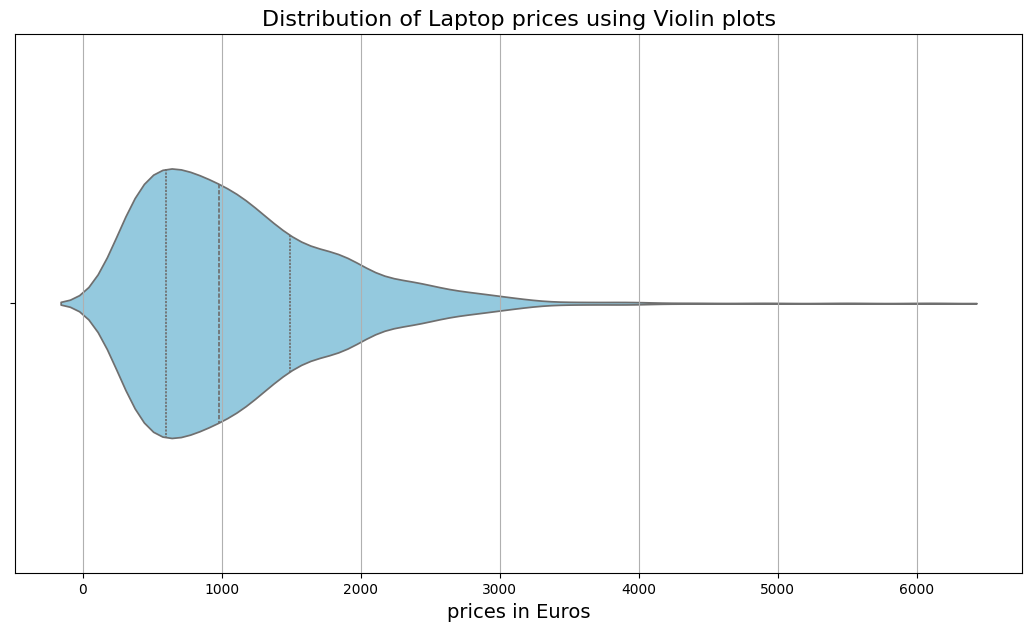

In [20]:
# Distribution of prices using violin plots.
plt.figure(figsize=(13, 7))
sns.violinplot(x=df["price_euros"], color="skyblue", orient="h", width=0.5, inner="quartile")
plt.title("Distribution of Laptop prices using Violin plots", fontsize=16)
plt.xlabel("prices in Euros", fontsize=14)
plt.grid(axis="x")
plt.show()

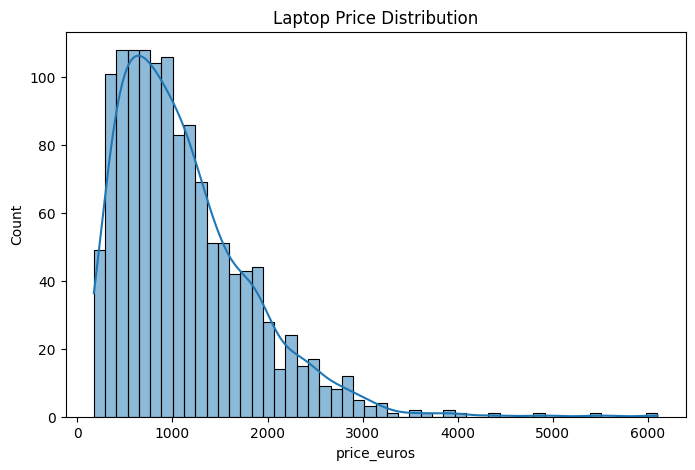

In [ ]:
# DISTRIBUTION OF PRICES USING HISTOGRAM
plt.figure(figsize=(8,5))
sns.histplot(df['price_euros'], bins=50, kde=True)
plt.title("Laptop Price Distribution")
plt.show()


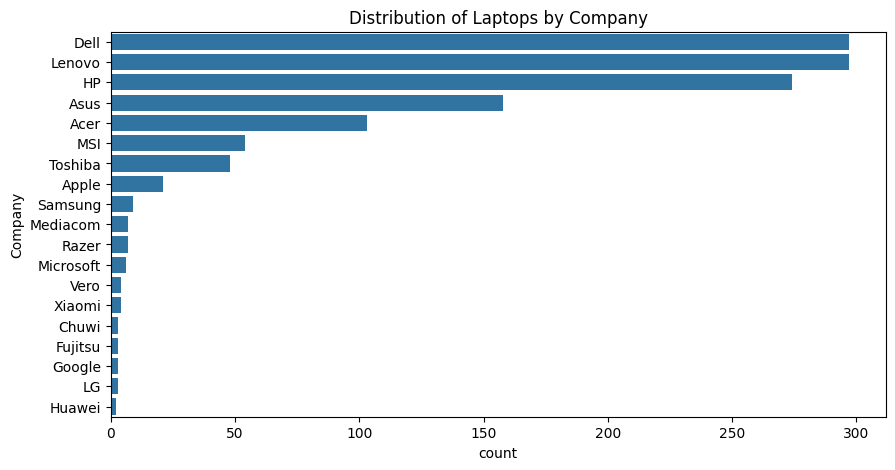

In [ ]:
# Distribution of Laptops by Company.
plt.figure(figsize=(10,5))
sns.countplot(y=df['Company'], order=df['Company'].value_counts().index)
plt.title("Distribution of Laptops by Company")
plt.show()

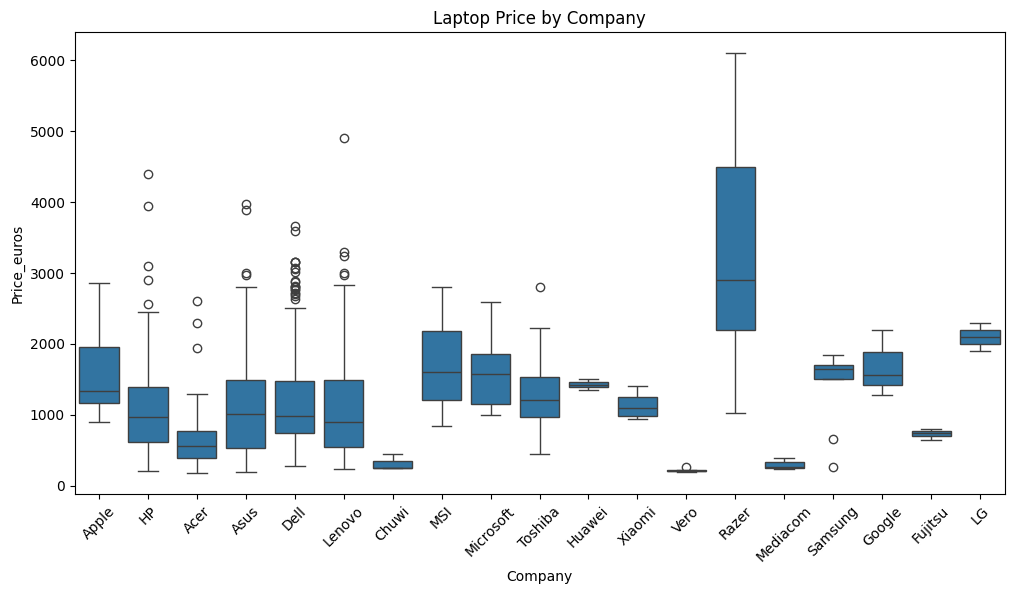

In [ ]:
# Distribution of Laptop Price by Company using Boxplots.
plt.figure(figsize=(12,6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title("Laptop Price by Company")
plt.show()

VISUALIZE OUTLIERS IN THE DATASETS

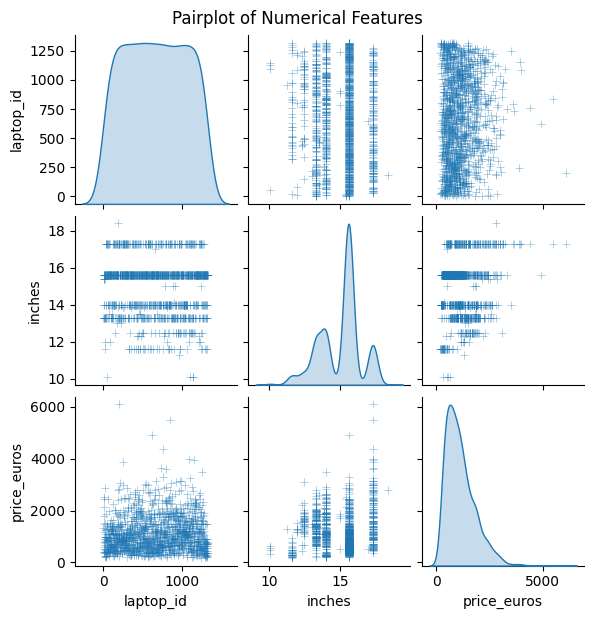

In [21]:
# DISPLAY OUTLIERS IN THE DATASETS AND THEIR RELATIONSHIPS USING PAIRPLOTS, HEATMAPS AND SCATTER PLOTS.
# Pairplots to visualize relationships between numerical features.
numerical_col = df.select_dtypes(include=["int64", "float64"]).columns
sns.pairplot(df[numerical_col], diag_kind="kde", markers="+", plot_kws={"alpha": 0.5}, height=2)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

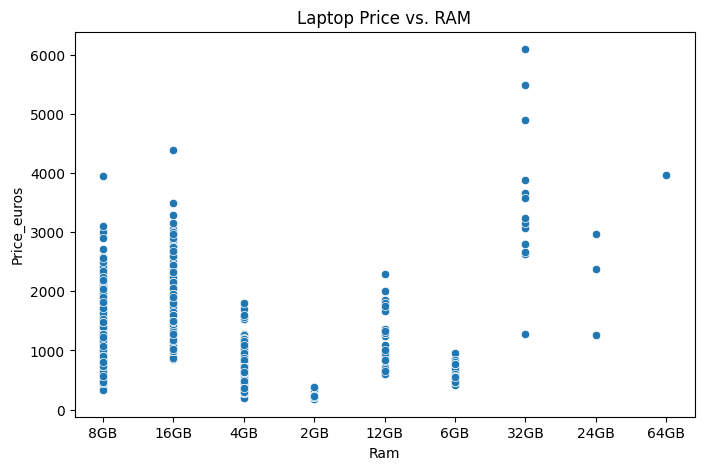

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Ram', y='Price_euros', data=df)
plt.title("Laptop Price vs. RAM")
plt.show()

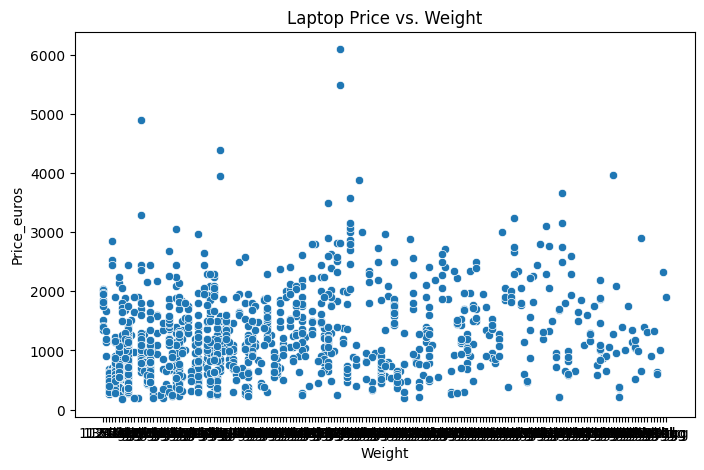

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Weight', y='Price_euros', data=df)
plt.title("Laptop Price vs. Weight")
plt.show()

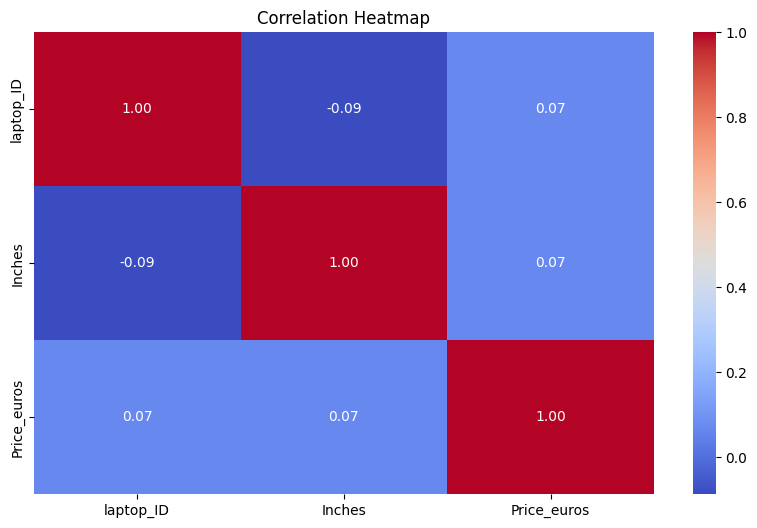

Price_euros    1.000000
Inches         0.068197
laptop_ID      0.067830
Name: Price_euros, dtype: float64

In [ ]:
# Focus on numerical features only
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

corr['Price_euros'].sort_values(ascending=False)

### Most Influential Factors Affecting Laptop prices Based on EDA Insights and Visualisations.

Based on the exploratory data analysis:

- **RAM**: Strong positive relationship with laptop prices. Laptops with higher RAM tend to be more expensive.  


- **Processor Type / CPU Generation**: Newer and faster processors significantly increase laptop price.  

- **GPU**: Laptops with dedicated GPUs (e.g., NVIDIA, AMD) cost more than those with integrated graphics.  

- **Company / Brand**: Premium brands such as Apple and Dell XPS models are generally more expensive.  

- **Storage Type**: SSD-based laptops are priced higher compared to HDD-only laptops.  


- **Weight**: Lightweight ultrabooks often have higher prices due to their premium build quality.

###  Conclusion
From the analysis, **RAM, processor type, and GPU presence** appear to be the most influential features affecting laptop prices.  
